In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
data = pd.read_csv('/content/drive/MyDrive/datamining/student/student-por.csv', delimiter=';')
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Arrange the Datset given avobe**

In [62]:
data_sorted = data.sort_values(by=['age', 'G1'], ascending=[True, False])


**EDA for the dataset**

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

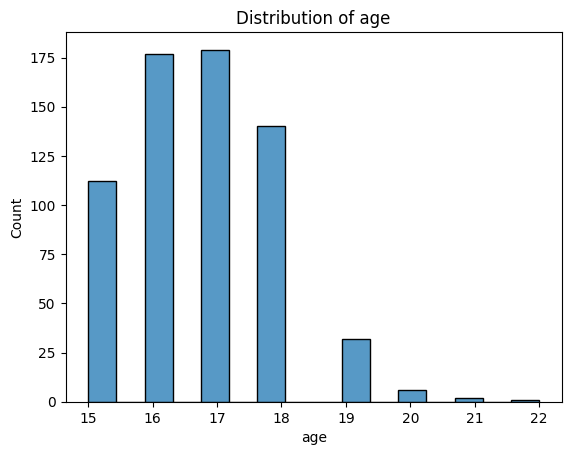

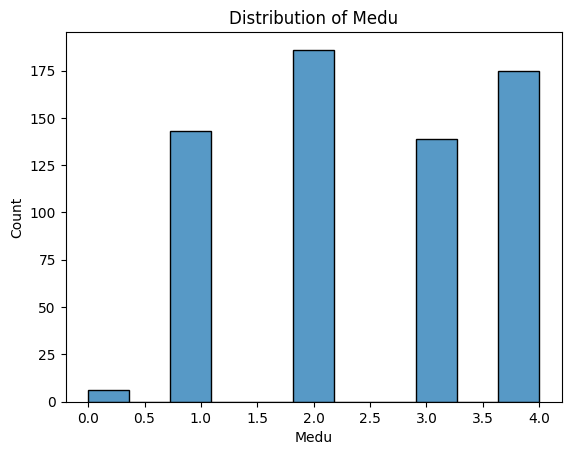

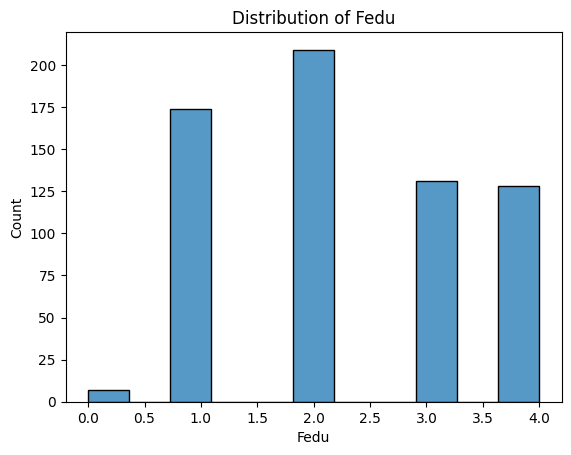

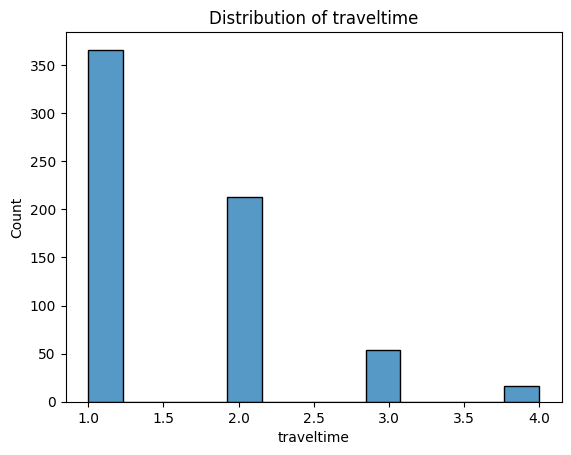

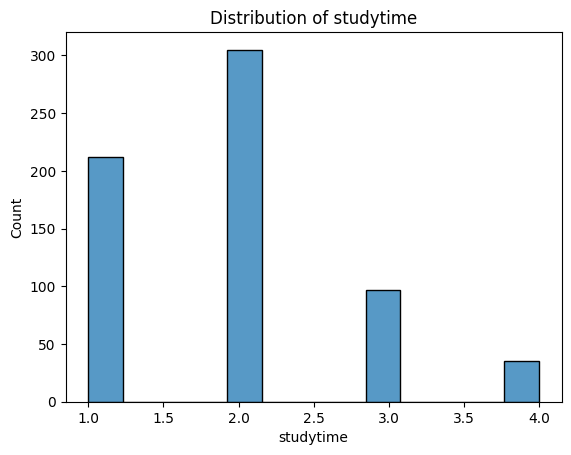

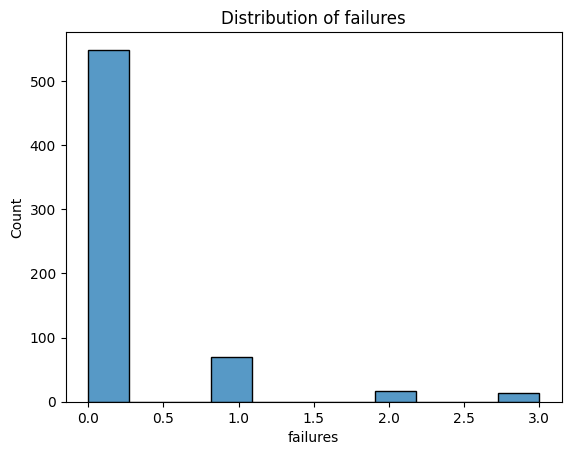

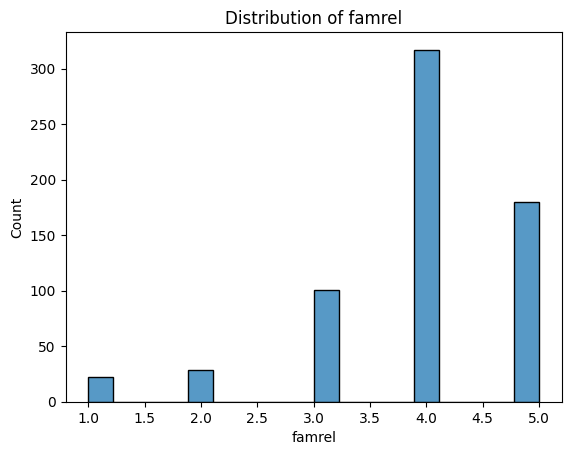

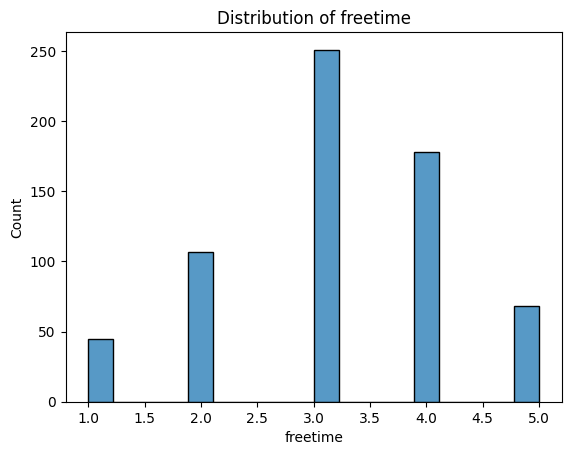

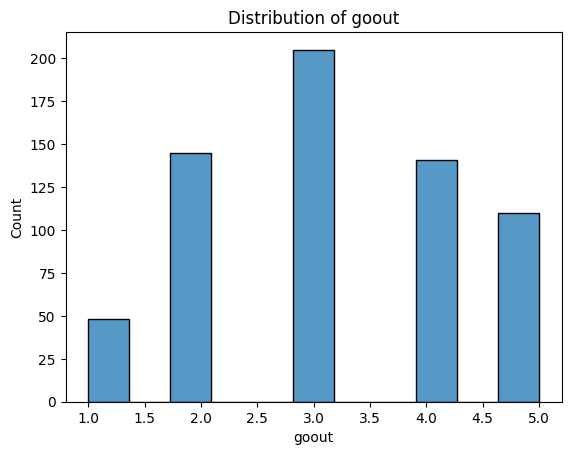

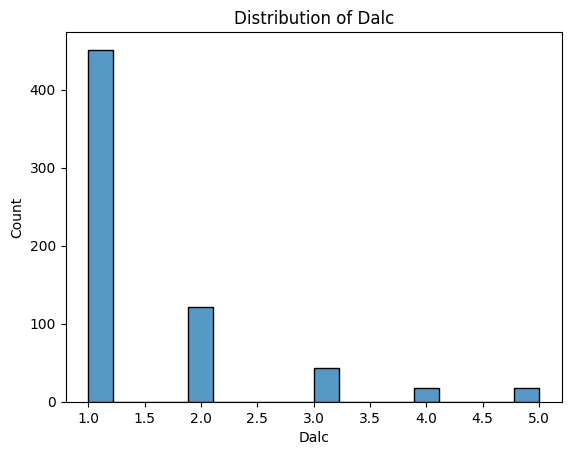

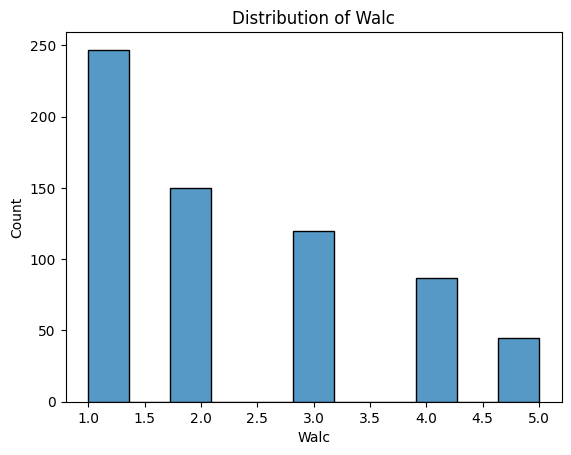

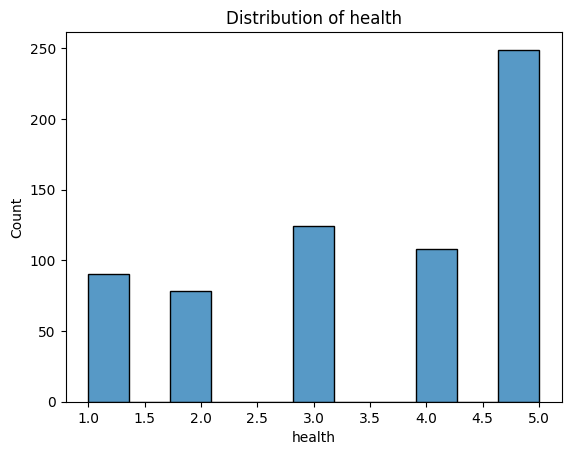

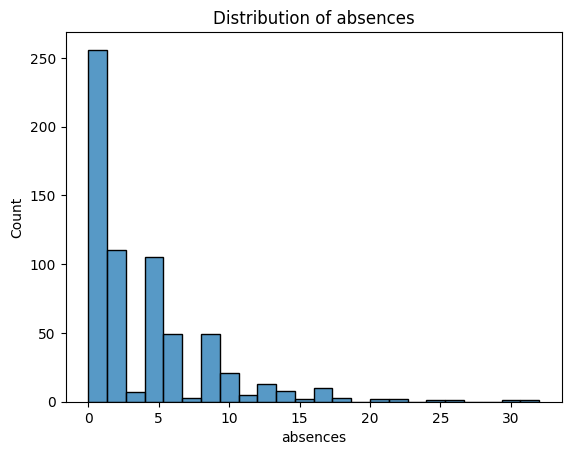

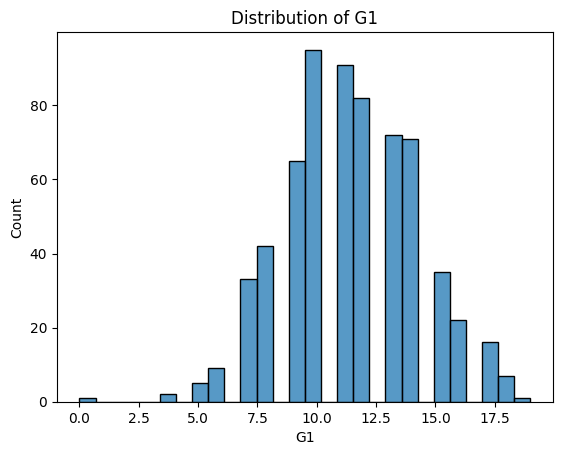

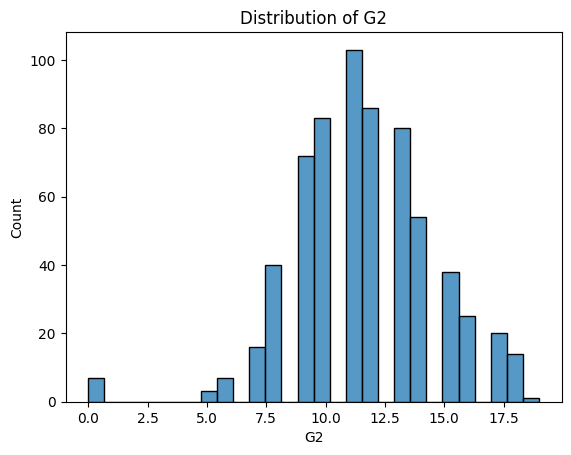

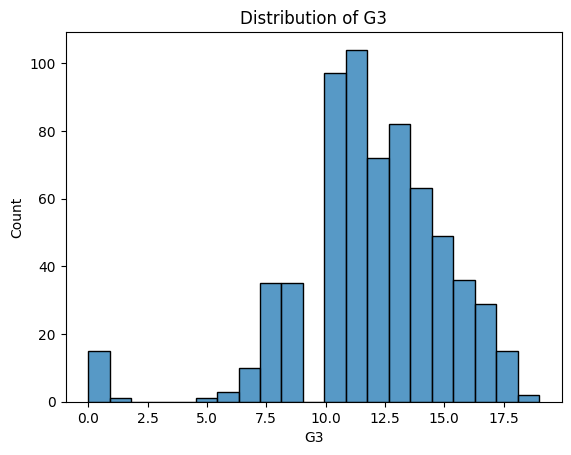

In [63]:
print(data.describe())


print(data.dtypes)

# Missing value analysis
print(data.isnull().sum())

# Correlation matrix

numerical_data = data.select_dtypes(include=['number']) # Select numerical columns
print(numerical_data.corr())

# Unique values in categorical columns

for column in data.columns:
  if data[column].dtype == 'object':
    print(f"Unique values in {column}: {data[column].unique()}")

# Distribution of numerical features



for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    plt.figure()
    sns.histplot(data[column])
    plt.title(f"Distribution of {column}")
    plt.show()

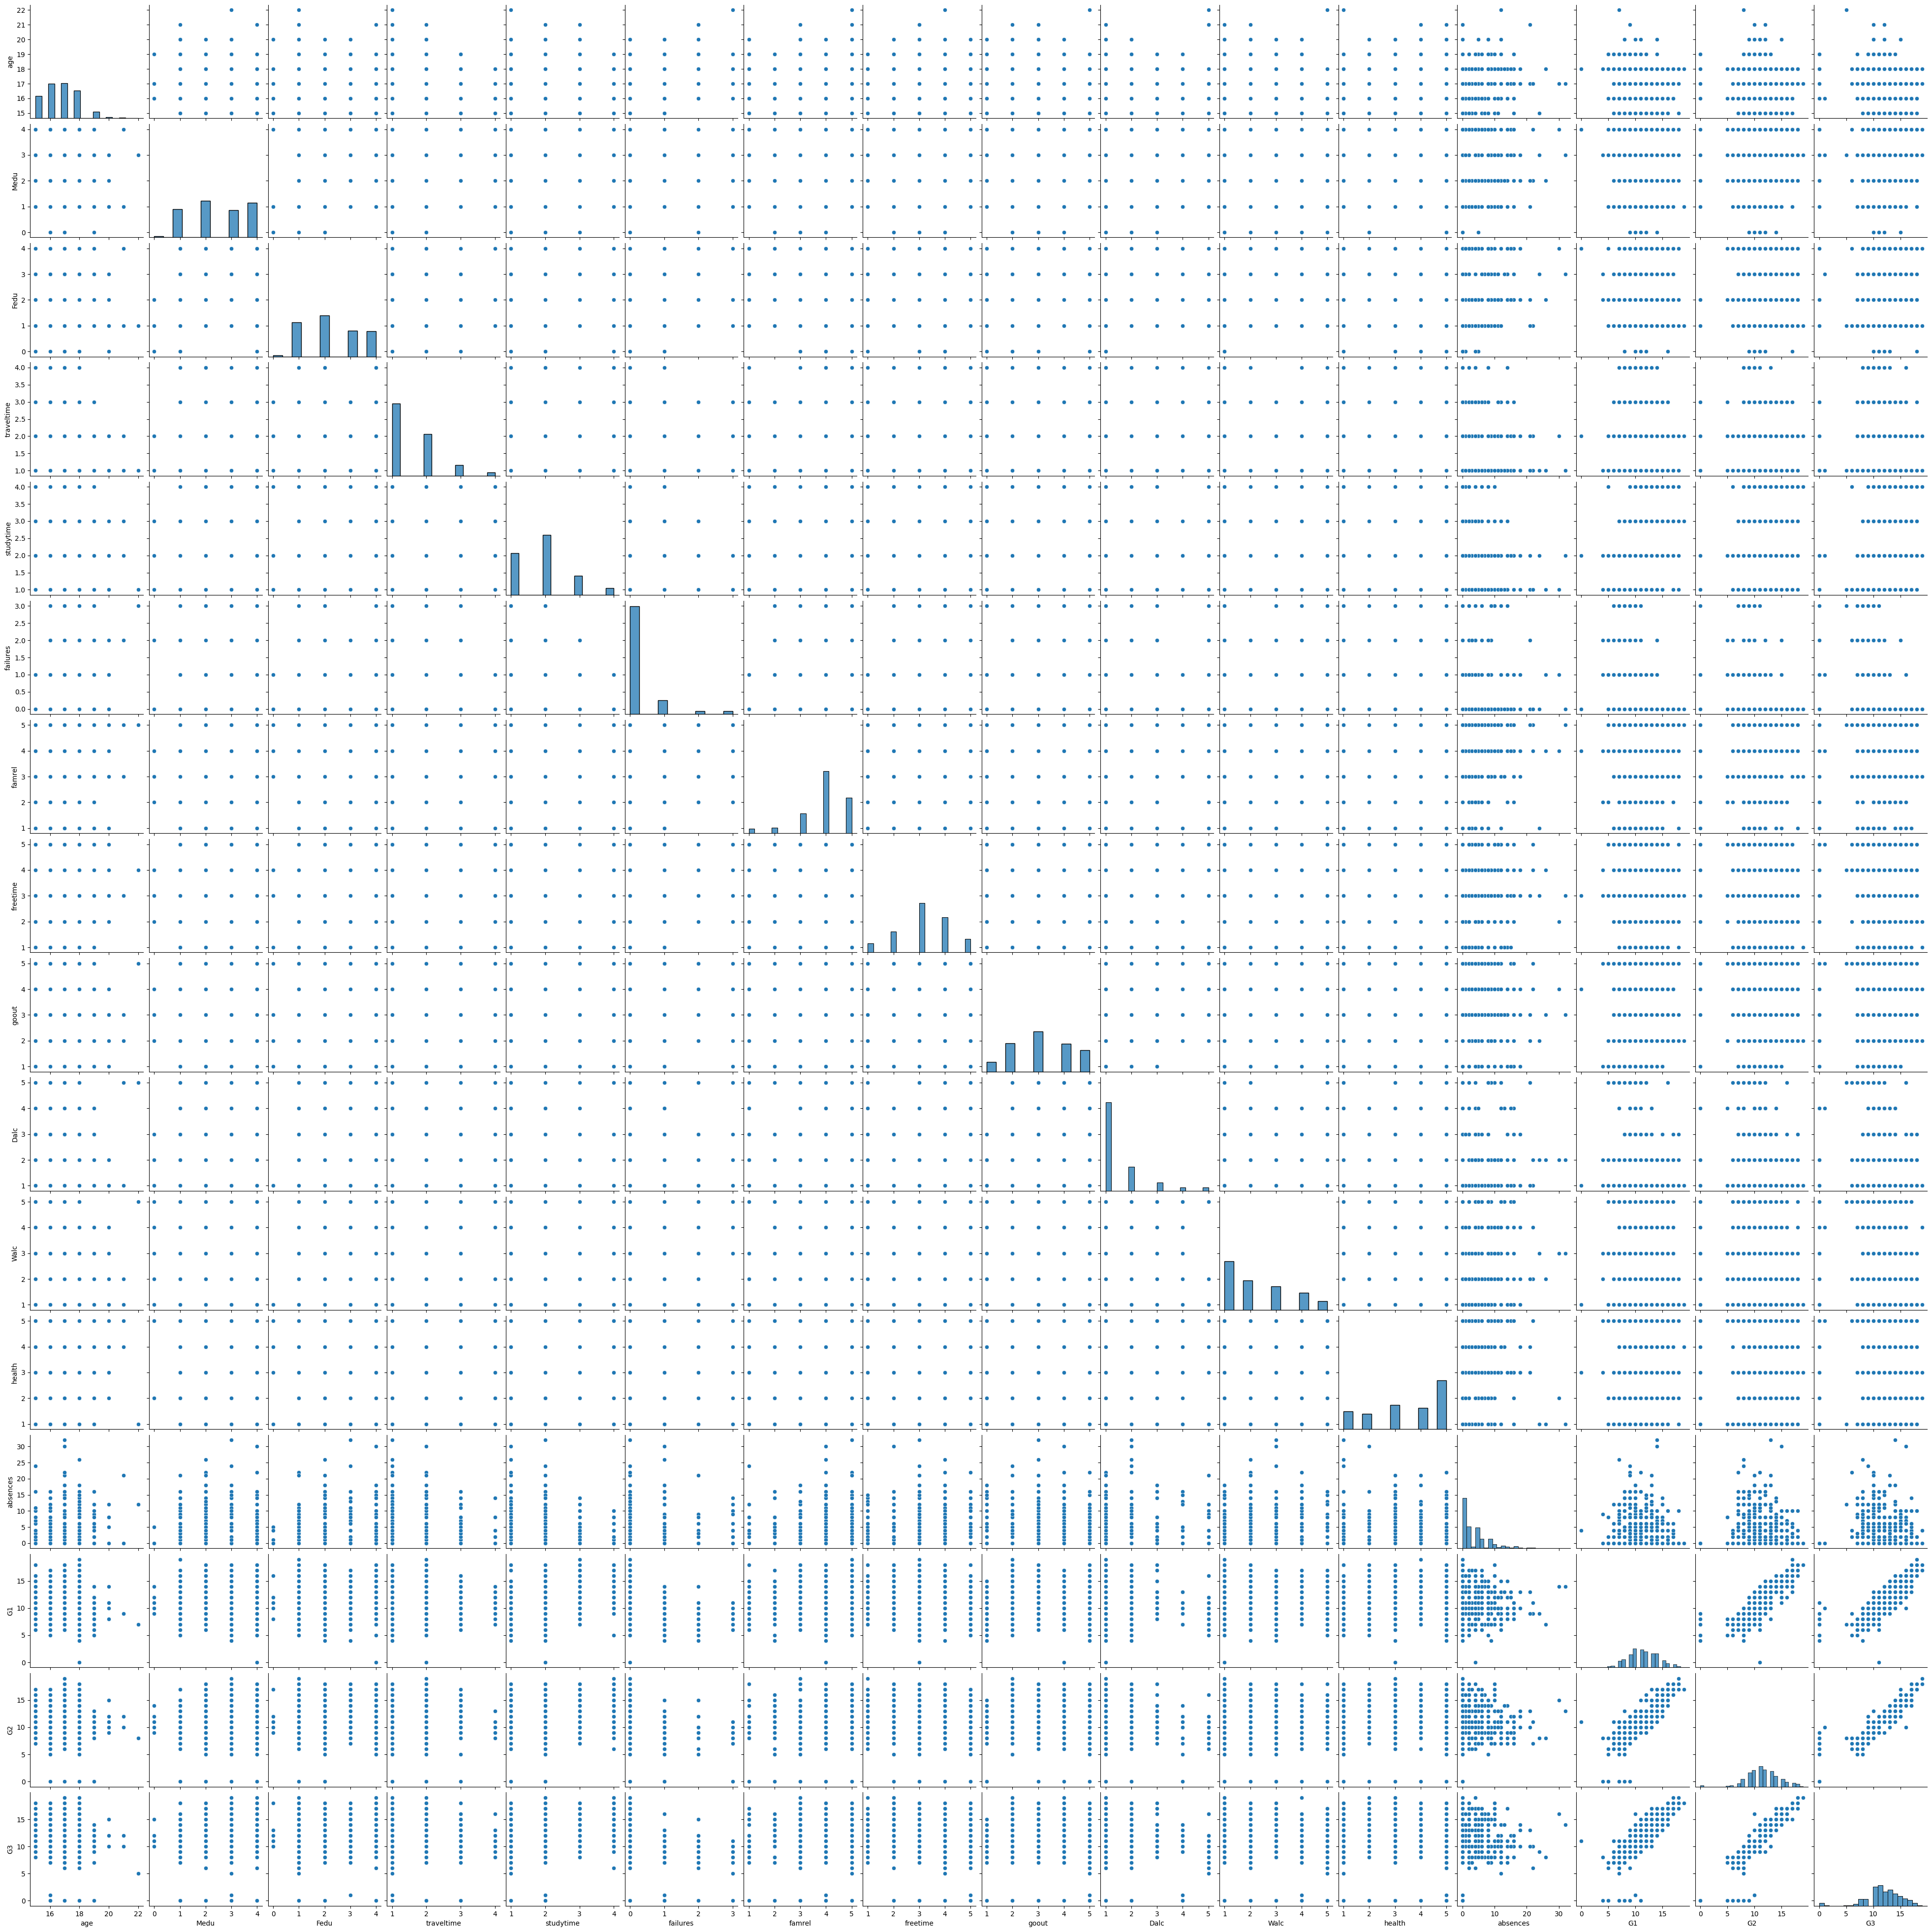

In [64]:
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
# 'sex' and 'address' are categorical, not numerical for pairplot analysis.

sns.pairplot(data[numerical_cols])
plt.show()

**Visualize the correlation matrix using a Heatmap**

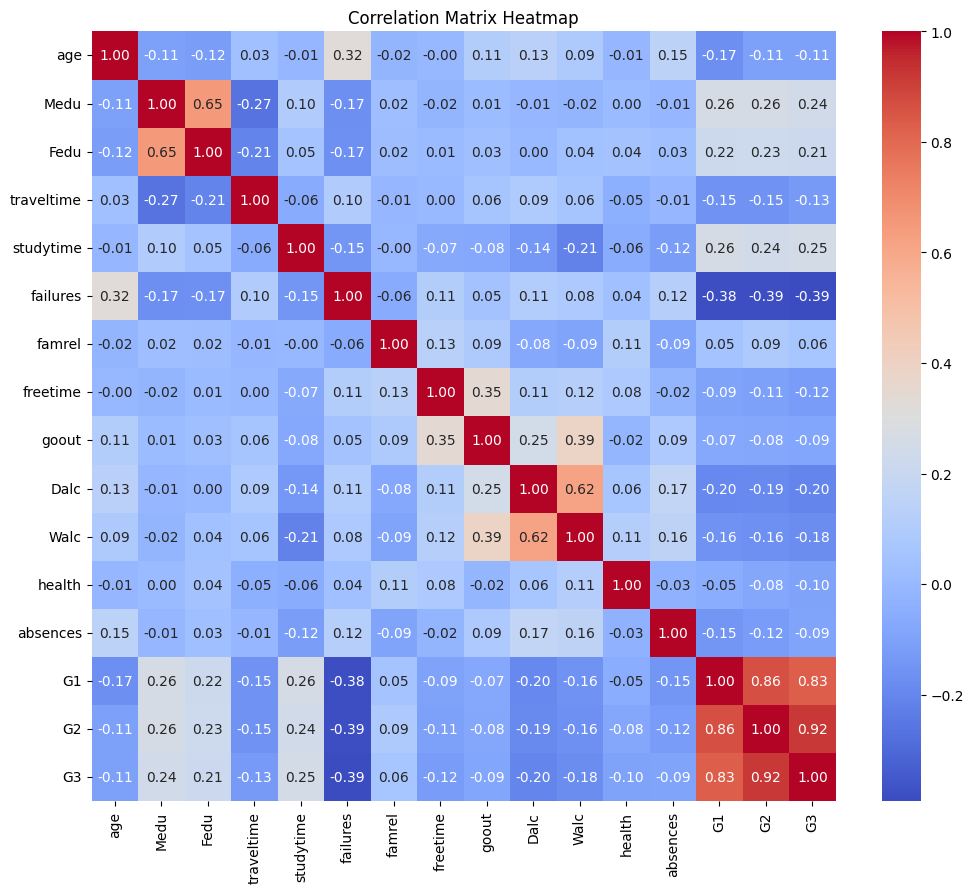

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Check for Outliers and if any Outlier found revome Outliers**

In [66]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


data_no_outliers = remove_outliers_iqr(data, 'age')



print(f"Number of rows before removing outliers: {len(data)}")
print(f"Number of rows after removing outliers: {len(data_no_outliers)}")

Number of rows before removing outliers: 649
Number of rows after removing outliers: 648


**Box-plot after removing Outlier for every column**

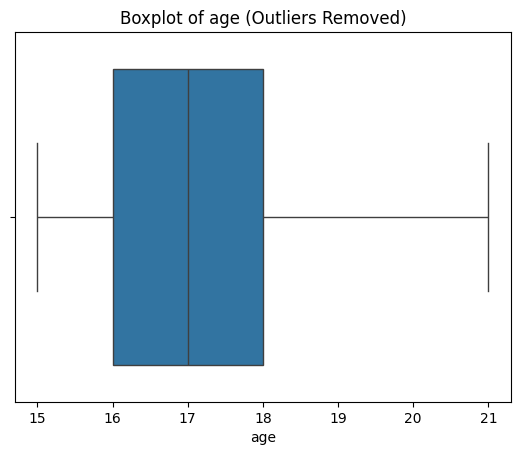

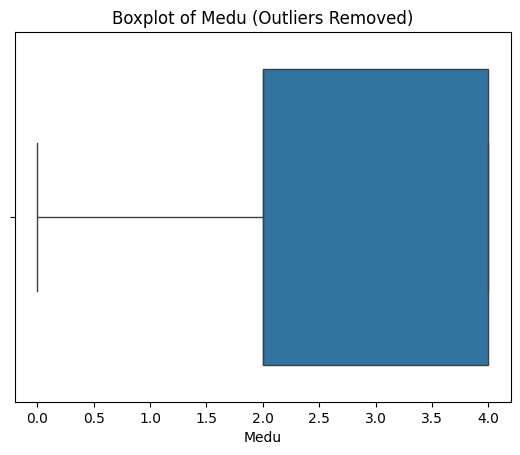

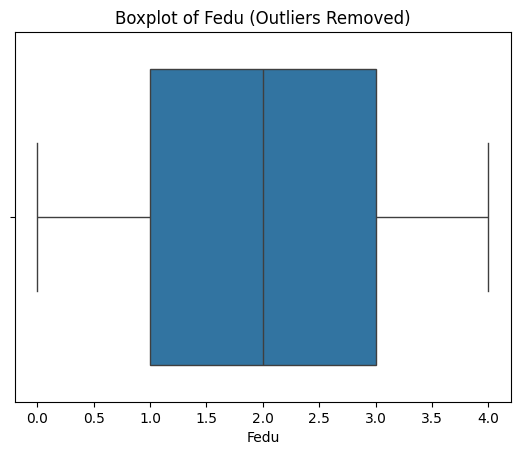

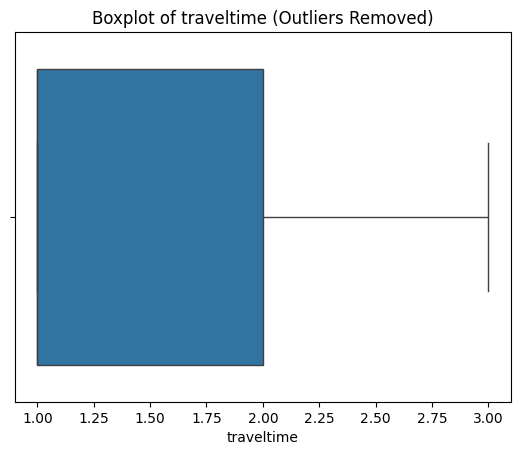

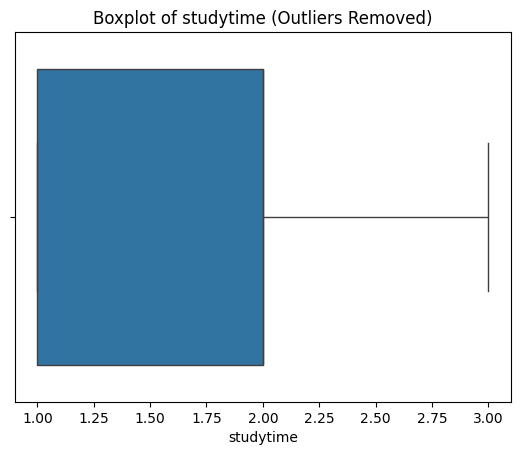

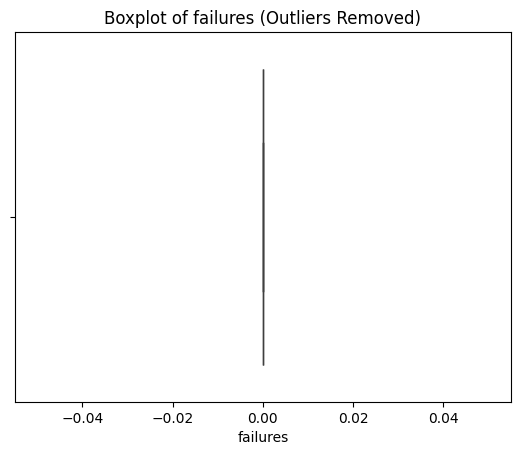

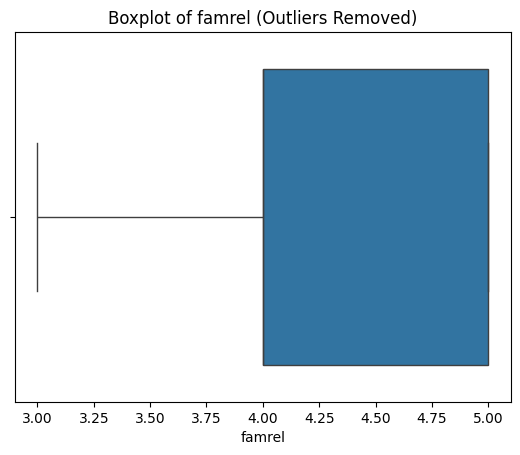

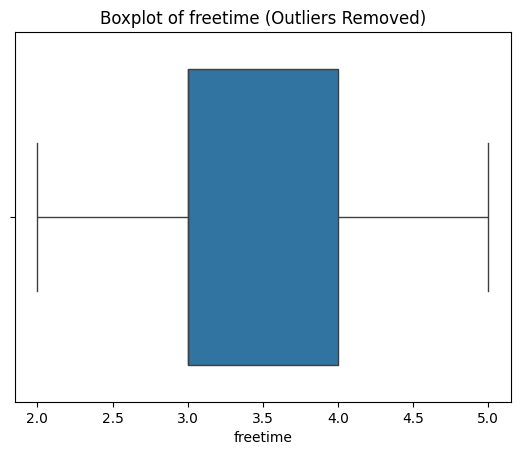

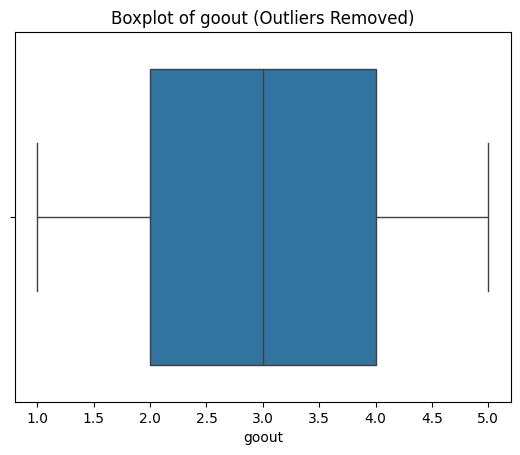

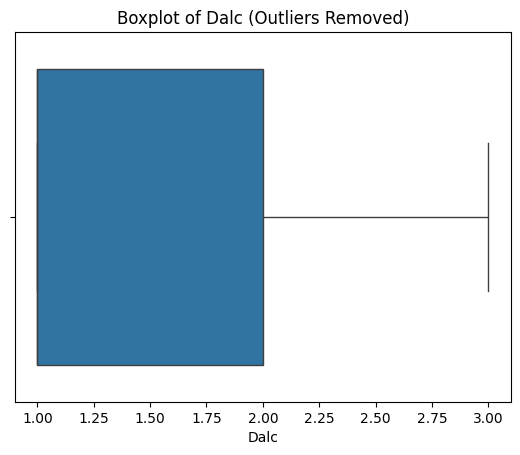

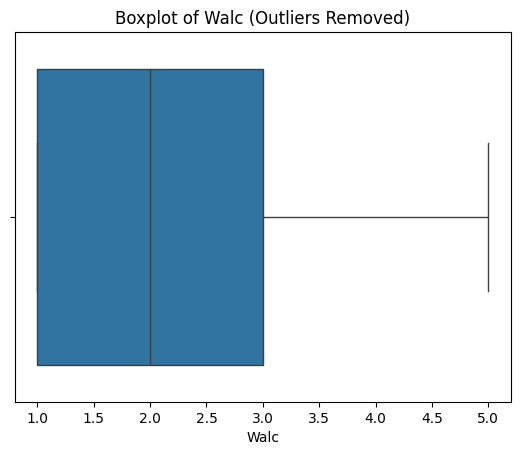

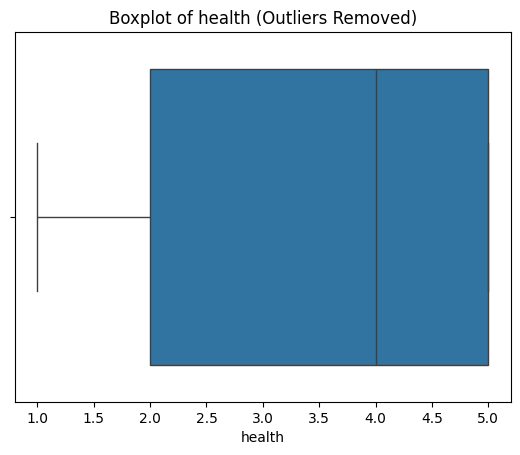

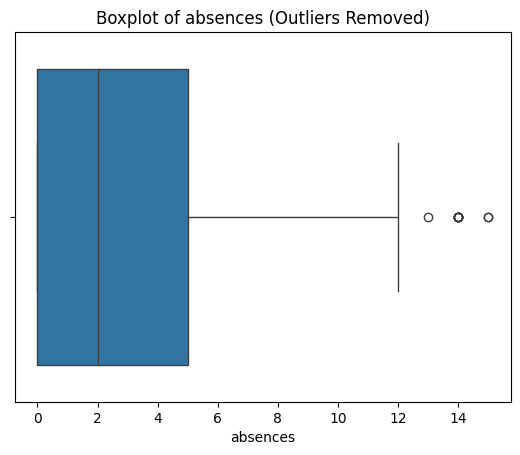

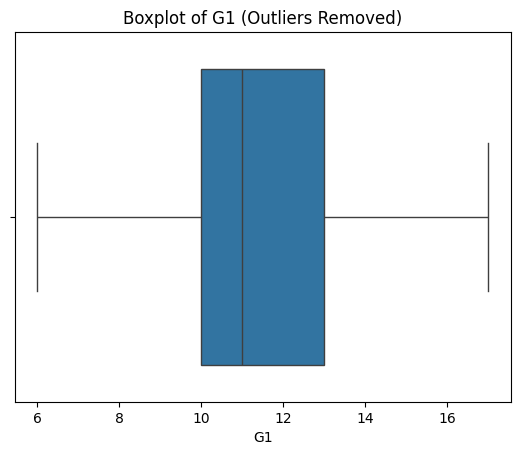

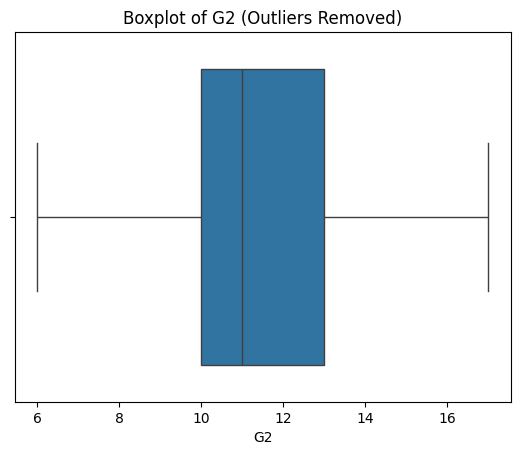

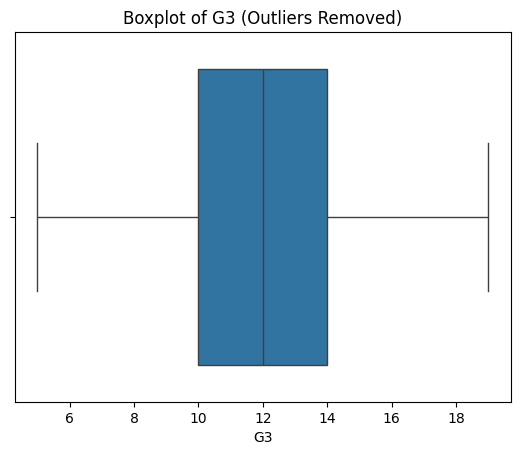

In [67]:
for column in data.select_dtypes(include=['number']).columns:
    data_no_outliers = remove_outliers_iqr(data, column)
    plt.figure()
    sns.boxplot(x=data_no_outliers[column])
    plt.title(f"Boxplot of {column} (Outliers Removed)")
    plt.show()

**Show Class Distribution**

Class Distribution:
G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

Class Percentages:
G3
11    16.024653
10    14.946071
13    12.634823
12    11.093991
14     9.707242
15     7.550077
16     5.546995
9      5.392912
8      5.392912
17     4.468413
18     2.311248
0      2.311248
7      1.540832
6      0.462250
19     0.308166
1      0.154083
5      0.154083
Name: count, dtype: float64

The dataset is considered imbalanced.


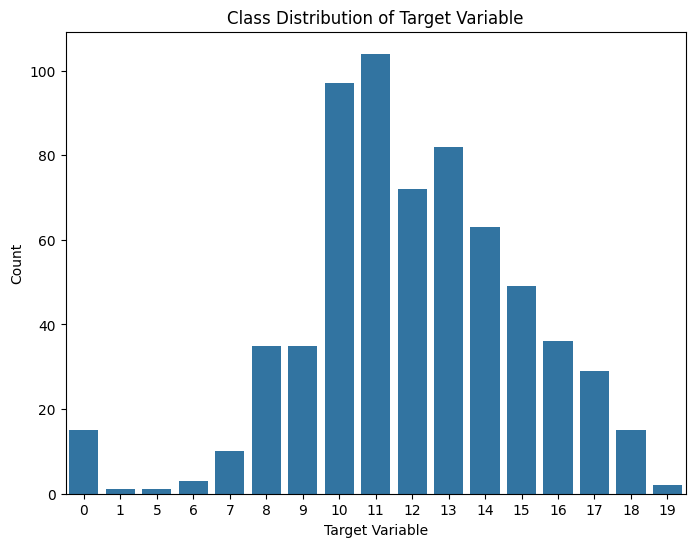

In [68]:
target_column = 'G3'

# Calculate the class distribution
class_counts = data[target_column].value_counts()

# Print the class counts
print("Class Distribution:")
print(class_counts)

# Calculate the percentage of each class
class_percentages = (class_counts / len(data)) * 100

# Print the class percentages
print("\nClass Percentages:")
print(class_percentages)

# Check if the dataset is balanced
# You can define a threshold for class imbalance (e.g., 10% difference between classes)
# If the difference in percentages is greater than the threshold, consider the dataset imbalanced

threshold = 10  # You can adjust this threshold as needed

if max(class_percentages) - min(class_percentages) > threshold:
    print("\nThe dataset is considered imbalanced.")
else:
    print("\nThe dataset is considered balanced.")

# You can visualize the class distribution using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=data)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.show()

**Class distribution Balancing and Oversampling**

In [69]:
target_column = 'G3'


X = data.drop(target_column, axis=1)
y = data[target_column]

# Check the class distribution before balancing

print("Class distribution before balancing:", Counter(y))


# Oversampling (increase minority class samples)
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Undersampling (reduce majority class samples)
# undersampler = RandomUnderSampler(random_state=42)
# X_under, y_under = undersampler.fit_resample(X, y)


print("Class distribution after oversampling:", Counter(y_over))

# Check the class distribution after balancing (for undersampling)

# We can use 'X_over, y_over' or 'X_under, y_under'
balanced_X = X_over
balanced_y = y_over

Class distribution before balancing: Counter({11: 104, 10: 97, 13: 82, 12: 72, 14: 63, 15: 49, 16: 36, 9: 35, 8: 35, 17: 29, 18: 15, 0: 15, 7: 10, 6: 3, 19: 2, 1: 1, 5: 1})
Class distribution after oversampling: Counter({11: 104, 12: 104, 14: 104, 13: 104, 17: 104, 15: 104, 7: 104, 10: 104, 16: 104, 9: 104, 8: 104, 18: 104, 6: 104, 0: 104, 1: 104, 5: 104, 19: 104})


**Model Training**

In [70]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in balanced_X
for column in balanced_X.select_dtypes(include=['object']).columns:
    # Fit the encoder to the unique values in the column
    label_encoder.fit(balanced_X[column].unique())
    # Transform the column using the encoder
    balanced_X[column] = label_encoder.transform(balanced_X[column])

X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

# 2. Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("\nDecision Tree Regression:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)

# 3. Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("\nRandom Forest Regression:")
print("Mean Squared Error:", mse_forest)
print("R-squared:", r2_forest)

# 4. Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Linear Regression:
Mean Squared Error: 3.615611202897044
R-squared: 0.880009222940805

Decision Tree Regression:
Mean Squared Error: 0.6242937853107344
R-squared: 0.9792816505401246

Random Forest Regression:
Mean Squared Error: 0.3528666666666666
R-squared: 0.9882894638954278

Support Vector Regression:
Mean Squared Error: 5.234768480185029
R-squared: 0.8262744796345656


In [71]:

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


models = {
    "Linear Regression": y_pred_linear,
    "Decision Tree Regression": y_pred_tree,
    "Random Forest Regression": y_pred_forest,
    "Support Vector Regression": y_pred_svr
}

for model_name, y_pred in models.items():
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R-squared: {r2:.4f}")

Linear Regression:
  MSE: 3.6156
  RMSE: 1.9015
  MAE: 1.3663
  R-squared: 0.8800
Decision Tree Regression:
  MSE: 0.6243
  RMSE: 0.7901
  MAE: 0.2175
  R-squared: 0.9793
Random Forest Regression:
  MSE: 0.3529
  RMSE: 0.5940
  MAE: 0.2627
  R-squared: 0.9883
Support Vector Regression:
  MSE: 5.2348
  RMSE: 2.2880
  MAE: 1.2811
  R-squared: 0.8263


**Evaluate the Best Model**

In [72]:

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2



models = {
    "Linear Regression": y_pred_linear,
    "Decision Tree Regression": y_pred_tree,
    "Random Forest Regression": y_pred_forest,
    "Support Vector Regression": y_pred_svr
}

results = []
for model_name, y_pred in models.items():
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    results.append([model_name, mse, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R-squared"])
print(results_df)

best_model = results_df.loc[results_df['R-squared'].idxmax()]
print("\nBest Model based on R-squared:")
best_model

                       Model       MSE      RMSE       MAE  R-squared
0          Linear Regression  3.615611  1.901476  1.366288   0.880009
1   Decision Tree Regression  0.624294  0.790123  0.217514   0.979282
2   Random Forest Regression  0.352867  0.594026  0.262712   0.988289
3  Support Vector Regression  5.234768  2.287962  1.281099   0.826274

Best Model based on R-squared:


,2
Model,Random Forest Regression
MSE,0.352867
RMSE,0.594026
MAE,0.262712
R-squared,0.988289


**Visualize Model Performance for all models**

<ipython-input-73-33c52135ac24>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)


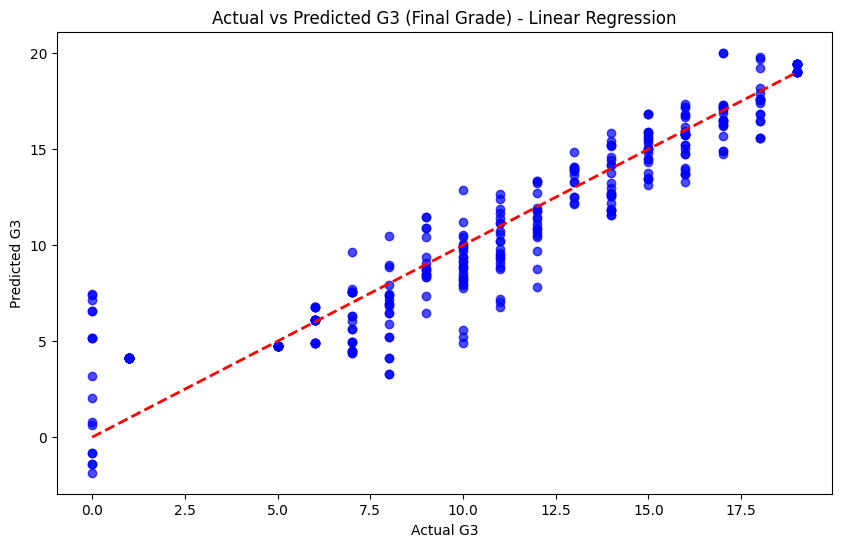

<ipython-input-73-33c52135ac24>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)


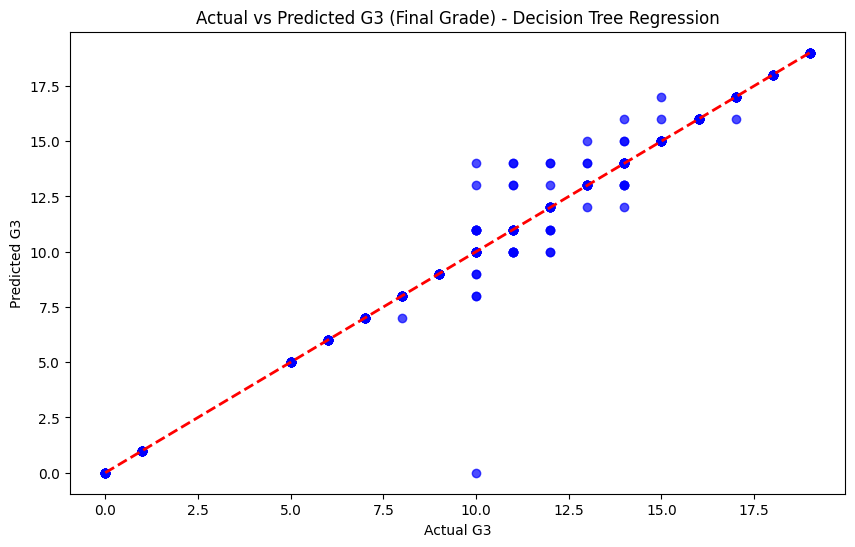

<ipython-input-73-33c52135ac24>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)


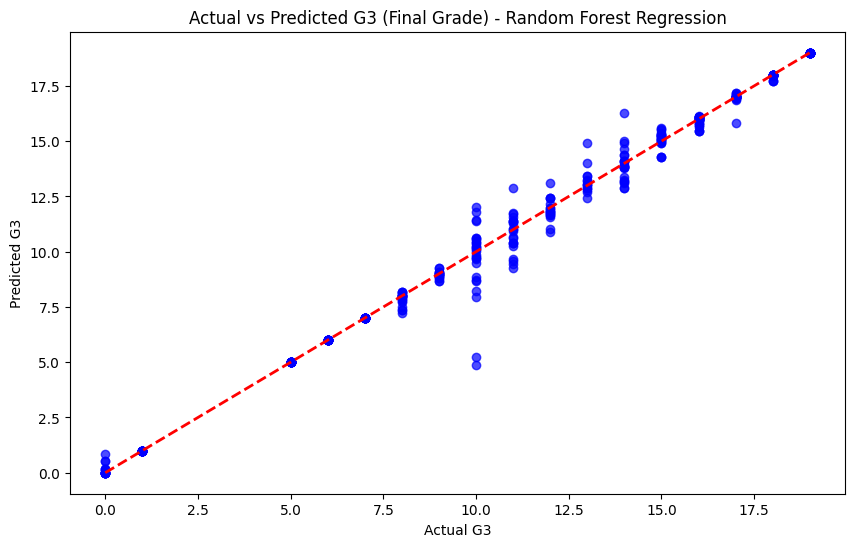

<ipython-input-73-33c52135ac24>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)


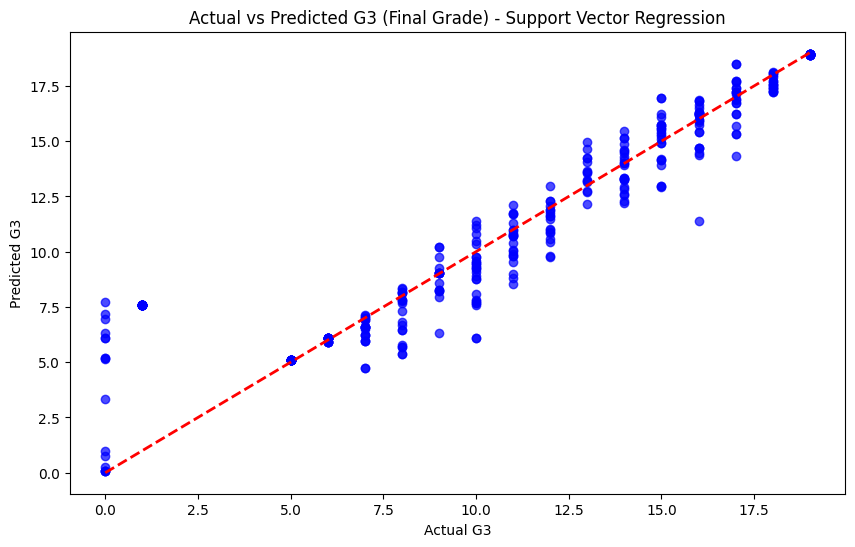

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)
plt.title("Actual vs Predicted G3 (Final Grade) - Linear Regression")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)
plt.title("Actual vs Predicted G3 (Final Grade) - Decision Tree Regression")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)
plt.title("Actual vs Predicted G3 (Final Grade) - Random Forest Regression")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)
plt.title("Actual vs Predicted G3 (Final Grade) - Support Vector Regression")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

**Line plot for comparison**

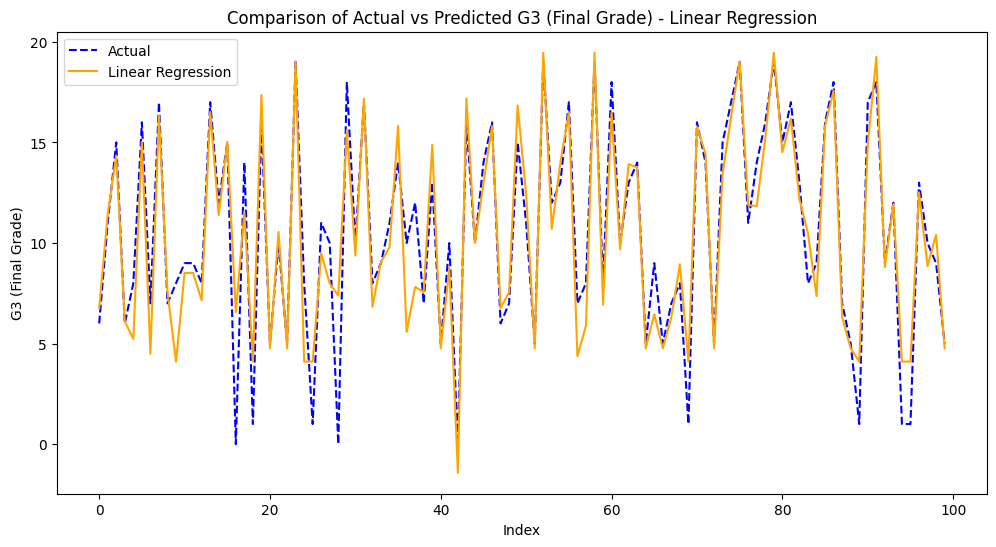

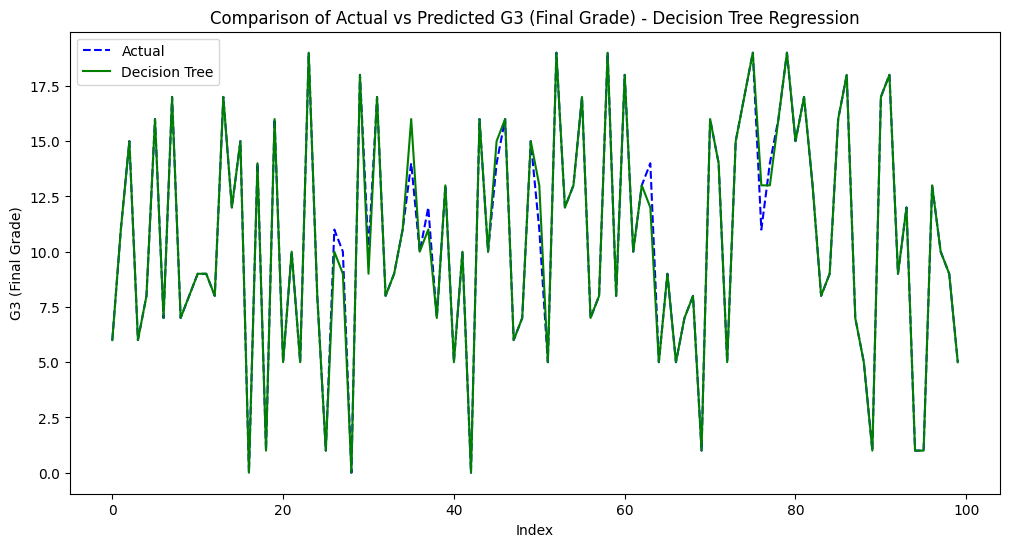

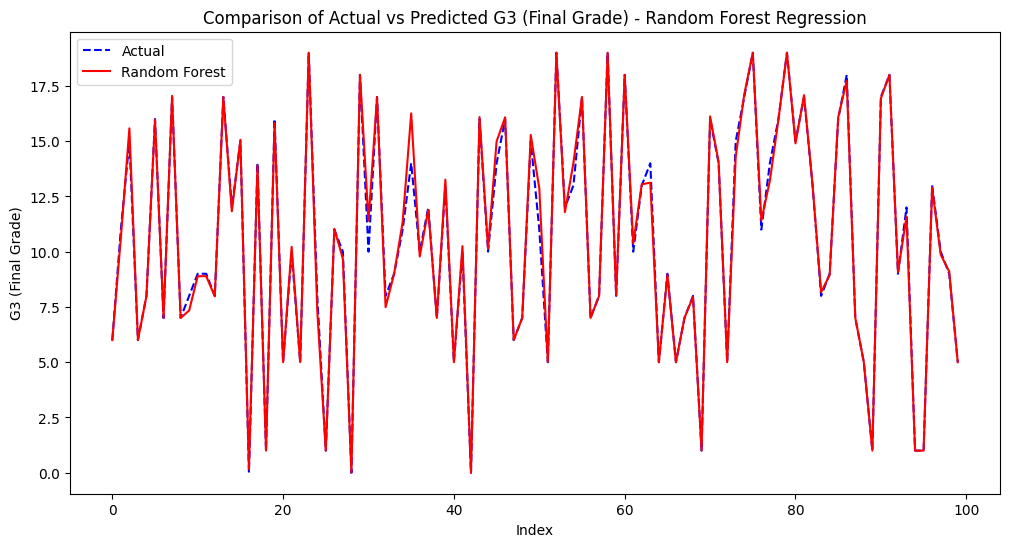

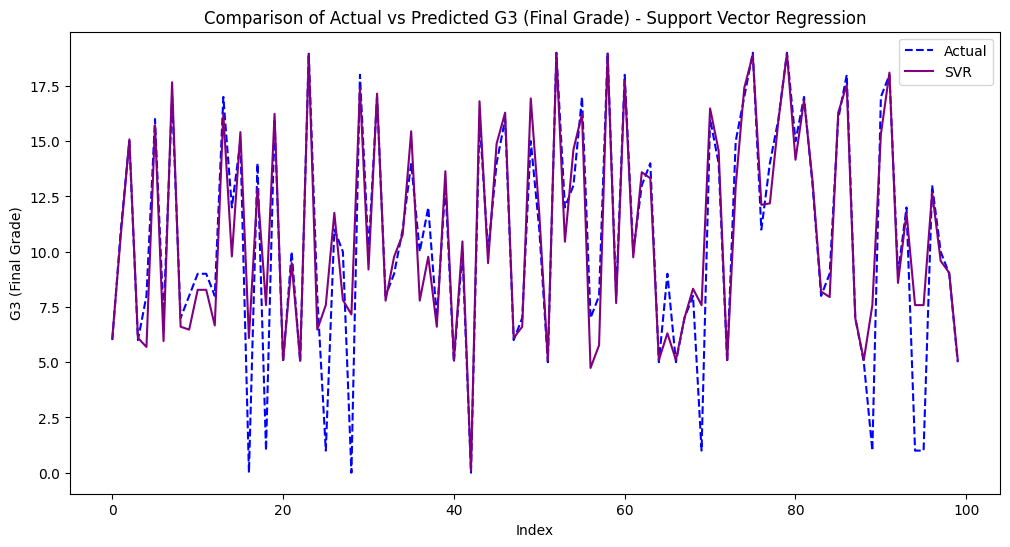

In [74]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue", linestyle="--")
plt.plot(y_pred_linear[:100], label="Linear Regression", color="orange")
plt.title("Comparison of Actual vs Predicted G3 (Final Grade) - Linear Regression")
plt.xlabel("Index")
plt.ylabel("G3 (Final Grade)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue", linestyle="--")
plt.plot(y_pred_tree[:100], label="Decision Tree", color="green")
plt.title("Comparison of Actual vs Predicted G3 (Final Grade) - Decision Tree Regression")
plt.xlabel("Index")
plt.ylabel("G3 (Final Grade)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue", linestyle="--")
plt.plot(y_pred_forest[:100], label="Random Forest", color="red")
plt.title("Comparison of Actual vs Predicted G3 (Final Grade) - Random Forest Regression")
plt.xlabel("Index")
plt.ylabel("G3 (Final Grade)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue", linestyle="--")
plt.plot(y_pred_svr[:100], label="SVR", color="purple")
plt.title("Comparison of Actual vs Predicted G3 (Final Grade) - Support Vector Regression")
plt.xlabel("Index")
plt.ylabel("G3 (Final Grade)")
plt.legend()
plt.show()

**Compare every Models Results with Plot**


Model Evaluation Results:
Linear Regression: MSE = 3.6156, R-squared = 0.8800
Decision Tree Regression: MSE = 0.6243, R-squared = 0.9793
Random Forest Regression: MSE = 0.3529, R-squared = 0.9883
Support Vector Regression: MSE = 5.2348, R-squared = 0.8263

The best model based on R-squared is: Random Forest Regression


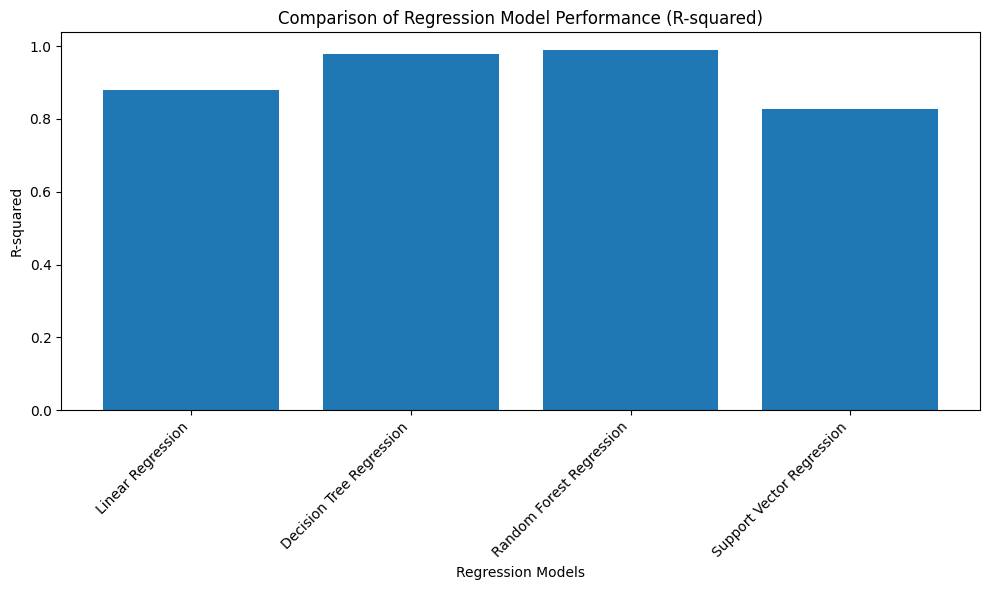

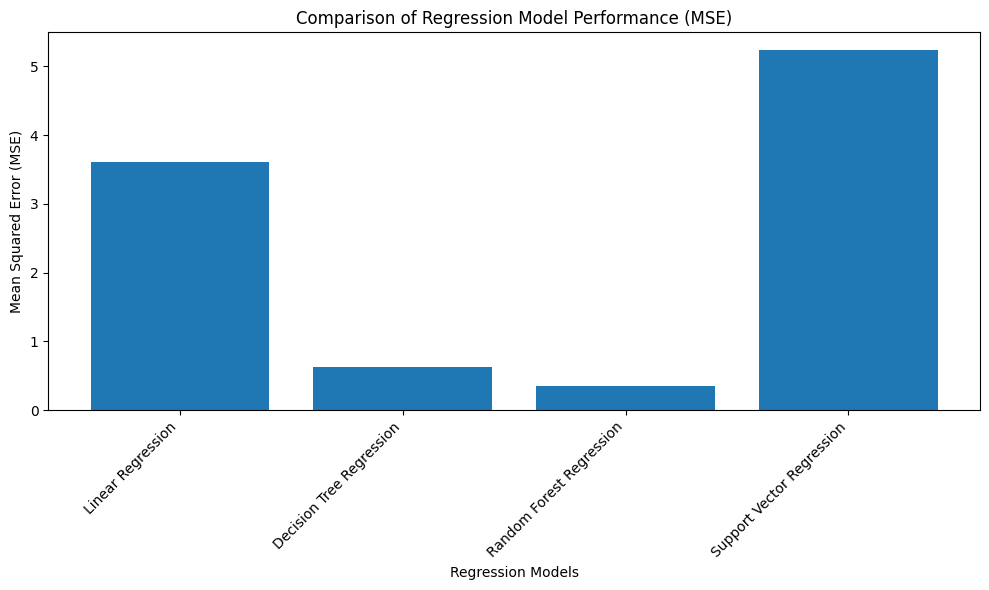

In [75]:
model_results = {
    "Linear Regression": {"MSE": mse_linear, "R-squared": r2_linear},
    "Decision Tree Regression": {"MSE": mse_tree, "R-squared": r2_tree},
    "Random Forest Regression": {"MSE": mse_forest, "R-squared": r2_forest},
    "Support Vector Regression": {"MSE": mse_svr, "R-squared": r2_svr},
}

# Find the best model based on R-squared (higher is better)
best_model = max(model_results, key=lambda model: model_results[model]["R-squared"])

print("\nModel Evaluation Results:")
for model, metrics in model_results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R-squared = {metrics['R-squared']:.4f}")

print(f"\nThe best model based on R-squared is: {best_model}")

# Plot the comparison of model results (R-squared)
plt.figure(figsize=(10, 6))
model_names = list(model_results.keys())
r2_scores = [model_results[model]["R-squared"] for model in model_names]

plt.bar(model_names, r2_scores)
plt.xlabel("Regression Models")
plt.ylabel("R-squared")
plt.title("Comparison of Regression Model Performance (R-squared)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot the comparison of model results (MSE)
plt.figure(figsize=(10, 6))
model_names = list(model_results.keys())
mse_scores = [model_results[model]["MSE"] for model in model_names]

plt.bar(model_names, mse_scores)
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Model Performance (MSE)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
